# NIM - Nama
## 1117009 - Michael Nathaniel Sutanto
## 1117017 - Richard William 
## 1117025 - Antonius Yanuar Kristianto
## 1117039 - Kevin Suwanda

<h1> Import Library </h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import warnings 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

# Eksplorasi Data

## Load Data

In [2]:
#path komputer masing2
polusi_udara = pd.read_csv('Measurement_summary.csv')
polusi_udara.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0


Dataset yang digunakan merupakan data rekap dari hasil pengukuran yang dilakukan di Seoul, Korea Selatan.<br>
berikut adalah fitur dari data tersebut:

<table>
    <tr>
        <th>Nama Fitur</th>
        <th>Keterangan</th>
    </tr>
    <tr>
        <td>Measurement date</td>
        <td>Menunjukkan tanggal pengukuran data</td>
    </tr>
    <tr>
        <td>Station Code</td>
        <td>Menunjukkan kode station pengukuran</td>
    </tr>
    <tr>
        <td>Instrument</td>
        <td>Menunjukkan alat pengukuran</td>
    </tr>
    <tr>
        <td>Address</td>
        <td>Alamat dari station pengukuran</td>
    </tr>
    <tr>
        <td>Latitude</td>
        <td>Garis lintang</td>
    </tr>
    <tr>
        <td>Longitude</td>
        <td>Garis bujur</td>
    </tr>
    <tr>
        <td>SO2</td>
        <td>Sulfur Oksida</td>
    </tr>
    <tr>
        <td>NO2</td>
        <td>Nitrogen Oksida</td>
    </tr>
    <tr>
        <td>O3</td>
        <td>Ozon</td>
    </tr>
    <tr>
        <td>CO</td>
        <td>Karbon Monoksida</td>
    </tr>
    <tr>
        <td>PM10</td>
        <td>Partikulat (PM10) adalah Partikel udara yang berukuran lebih kecil dari 10 mikron (mikrometer).</td>
    </tr>
    <tr>
        <td>PM2.5</td>
        <td>Partikulat (PM2.5) adalah Partikel udara yang berukuran lebih kecil dari 2.5 mikron (mikrometer).</td>
    </tr>
</table>

Semua fitur pada dataset yang dijelaskan di atas merupakan variable numerikal.

Pada data yang digunakan, tidak terdapat label yang menunjukkan kelas polusi udara (rendah/menengah/tinggi).
Karena itu, data yang digunakan termasuk sebagai data unsupervised.

## Analisis Statistik Deskriptif

In [3]:
polusi_udara.describe(include="all")

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
count,647511,647511.000000,647511,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000
unique,25906,NaN,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2017-01-07 23:00,NaN,"369, Yongmasan-ro, Jungnang-gu, Seoul, Republi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,25,NaN,25906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,113.000221,NaN,37.553484,126.989340,-0.001795,0.022519,0.017979,0.509197,43.708051,25.411995
std,NaN,7.211315,NaN,0.053273,0.078790,0.078832,0.115153,0.099308,0.405319,71.137342,43.924595
min,NaN,101.000000,NaN,37.452357,126.835151,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,NaN,107.000000,NaN,37.517528,126.927102,0.003000,0.016000,0.008000,0.300000,22.000000,11.000000
50%,NaN,113.000000,NaN,37.544962,127.004850,0.004000,0.025000,0.021000,0.500000,35.000000,19.000000
75%,NaN,119.000000,NaN,37.584848,127.047470,0.005000,0.038000,0.034000,0.600000,53.000000,31.000000


## Missing Value

In [4]:
polusi_udara.isnull().sum()

Measurement date    0
Station code        0
Address             0
Latitude            0
Longitude           0
SO2                 0
NO2                 0
O3                  0
CO                  0
PM10                0
PM2.5               0
dtype: int64

## Duplicate values

In [5]:
duplicateRow = polusi_udara[polusi_udara.duplicated()]
print(duplicateRow)

Empty DataFrame
Columns: [Measurement date, Station code, Address, Latitude, Longitude, SO2, NO2, O3, CO, PM10, PM2.5]
Index: []


Missing values dan Duplicate values tidak ada, karena data didapatkan dari station yang terus beroperasi dengan alat yang baik.

## Outlier 

## SO2

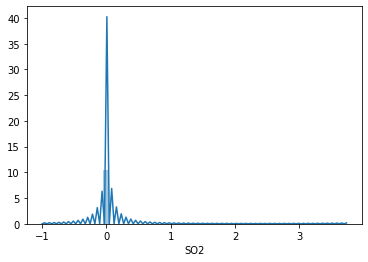

In [6]:
sns.distplot(polusi_udara['SO2'])

In [7]:
q = polusi_udara['SO2'].quantile(0.99)
q

0.01

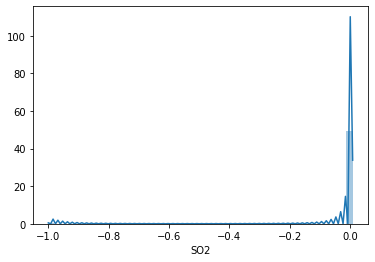

In [8]:
data_1 = polusi_udara[polusi_udara['SO2'] < q]
sns.distplot(data_1['SO2'])

In [9]:
q = data_1['SO2'].quantile(0.01)
q

0.0

6952781

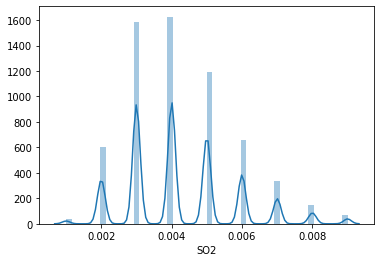

In [10]:
data_2 = data_1[data_1['SO2'] > q]
sns.distplot(data_2['SO2'])
data_2.size

## NO2

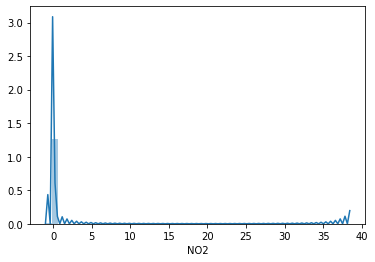

In [11]:
sns.distplot(polusi_udara['NO2'])

In [12]:
q = data_2['NO2'].quantile(0.98)
q

0.067

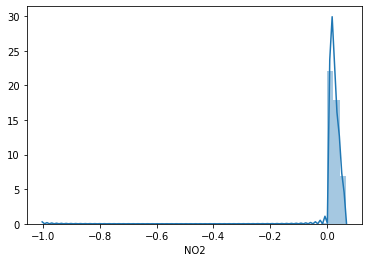

In [13]:
data_3 = data_2[data_2['NO2'] < q]
sns.distplot(data_3['NO2'])

In [14]:
q = data_3['NO2'].quantile(0.01)
q

0.005

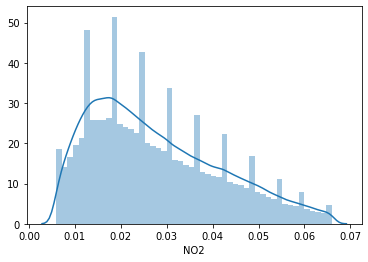

In [15]:
data_4 = data_3[data_3['NO2'] > q]
sns.distplot(data_4['NO2'])

## O3

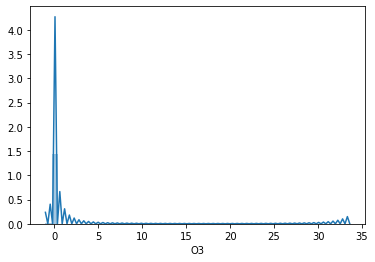

In [16]:
sns.distplot(polusi_udara['O3'])

In [17]:
q = data_4['O3'].quantile(0.99)
q

0.084

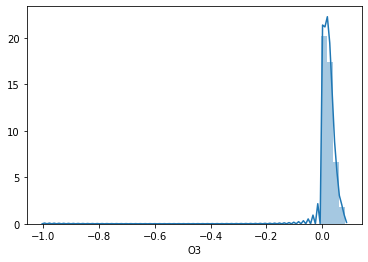

In [18]:
data_5 = data_4[data_4['O3'] < q]
sns.distplot(data_5['O3'])

In [19]:
q = data_5['O3'].quantile(0.01)
q

0.001

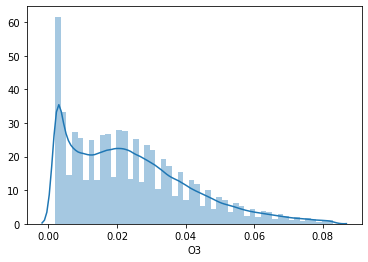

In [20]:
data_6 = data_5[data_5['O3'] > q]
sns.distplot(data_6['O3'])

## CO

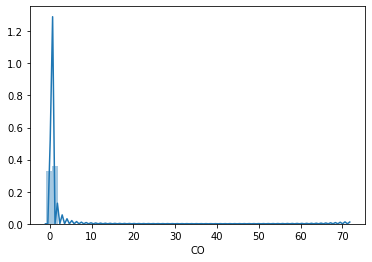

In [21]:
sns.distplot(polusi_udara['CO'])

In [22]:
q = data_6['CO'].quantile(0.99)
q

1.2

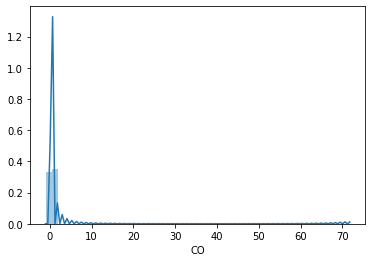

In [23]:
data_7 = data_6[data_6['CO'] < q]
sns.distplot(data_6['CO'])

In [24]:
q = data_7['CO'].quantile(0.01)
q

0.2

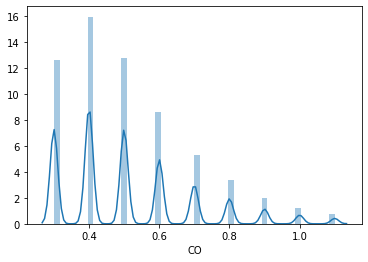

In [25]:
data_8 = data_7[data_7['CO'] > q]
sns.distplot(data_8['CO'])

In [26]:
data_cleaned = data_8.reset_index(drop=True)
print ("Jumlah data clean", data_cleaned.size)
print ("Jumlah data asli", polusi_udara.size)

Jumlah data clean 6031575
Jumlah data asli 7122621


In [27]:
data_cleaned.describe()

,Station code,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
count,548325.000000,548325.000000,548325.000000,548325.000000,548325.000000,548325.000000,548325.000000,548325.000000,548325.000000
mean,112.957175,37.554352,126.991545,0.004243,0.028040,0.024132,0.510364,43.135039,24.811448
std,7.239513,0.053373,0.078939,0.001510,0.013813,0.017505,0.184715,66.653610,41.679247
min,101.000000,37.452357,126.835151,0.001000,0.006000,0.002000,0.300000,-1.000000,-1.000000
25%,107.000000,37.517528,126.927102,0.003000,0.017000,0.010000,0.400000,23.000000,12.000000
50%,113.000000,37.544962,127.004850,0.004000,0.026000,0.021000,0.500000,35.000000,19.000000
75%,119.000000,37.584848,127.047470,0.005000,0.037000,0.034000,0.600000,52.000000,30.000000
max,125.000000,37.658774,127.136792,0.009000,0.066000,0.083000,1.100000,3586.000000,6256.000000


## Korelasi Antar Variable menggunakan Pearson Correlation

In [28]:
data_cleaned.corr(method='pearson')

,Station code,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
Station code,1.000000,-0.478379,0.065208,0.070437,0.037608,-0.034636,-0.077804,0.031389,0.019272
Latitude,-0.478379,1.000000,0.301133,-0.032694,-0.123985,0.056274,0.103224,-0.024839,-0.025448
Longitude,0.065208,0.301133,1.000000,0.006271,-0.019416,-0.033605,0.043382,-0.024811,-0.022434
SO2,0.070437,-0.032694,0.006271,1.000000,0.241622,0.006073,0.245695,0.129452,0.127558
NO2,0.037608,-0.123985,-0.019416,0.241622,1.000000,-0.500221,0.601323,0.142619,0.163560
O3,-0.034636,0.056274,-0.033605,0.006073,-0.500221,1.000000,-0.347595,0.027341,0.012303
CO,-0.077804,0.103224,0.043382,0.245695,0.601323,-0.347595,1.000000,0.177387,0.213514
PM10,0.031389,-0.024839,-0.024811,0.129452,0.142619,0.027341,0.177387,1.000000,0.202350
PM2.5,0.019272,-0.025448,-0.022434,0.127558,0.163560,0.012303,0.213514,0.202350,1.000000


In [29]:
data_cleaned

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 05:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.046,0.002,1.1,70.0,61.0
1,2017-01-01 06:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.049,0.002,1.1,66.0,57.0
2,2017-01-01 07:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.045,0.002,1.0,71.0,60.0
3,2017-01-01 08:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.047,0.002,1.1,72.0,60.0
4,2017-01-01 09:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.047,0.002,1.1,74.0,63.0
...,...,...,...,...,...,...,...,...,...,...,...
548320,2019-12-31 19:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.028,0.013,0.5,23.0,17.0
548321,2019-12-31 20:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.025,0.015,0.4,25.0,19.0
548322,2019-12-31 21:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.023,0.015,0.4,24.0,17.0
548323,2019-12-31 22:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.040,0.004,0.5,25.0,18.0


In [30]:
data_particle = data_cleaned.copy()
data_particle = data_particle.drop(['Measurement date', 'Address', 'Station code', 'Latitude', 'Longitude'], axis=1)

data_particle.shape

(548325, 6)

In [31]:
# sns.pairplot(data_particle)

## Feature encoding terhadap semua variabel kategorikal

Karena data non-numerik (Measurement Date, Station Code, Latitude, Longitude) sudah tidak digunakan, jadi tidak perlu dilakukan Feature Encoding lagi.

# Feature Selection

## Information Gain menggunakan Entropy

Information gain ditujukan data supervised, sehingga tidak dapat digunakan untuk data unsupervised.
Karena itu information gain tidak dilakukan. <br>

Referensi : https://datascience.stackexchange.com/questions/29572/is-it-possible-to-do-feature-selection-for-unsupervised-machine-learning-problem

In [32]:
temporary_data = data_particle.copy()
variables = temporary_data
vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [33]:
vif

,VIF,Features
0,8.450210,SO2
1,9.066116,NO2
2,2.694118,O3
3,11.708997,CO
4,1.528260,PM10
5,1.469968,PM2.5


In [34]:
temporary_data = temporary_data.drop(['CO'], axis=1)
variables = temporary_data
vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [35]:
vif

,VIF,Features
0,7.433132,SO2
1,5.009485,NO2
2,2.602302,O3
3,1.519830,PM10
4,1.455355,PM2.5


## Principal Component Analysis

In [36]:
matrix_normalization = (data_particle - data_particle.mean()) / data_particle.std()
df_normalization = pd.DataFrame(matrix_normalization)
df_normalization

,SO2,NO2,O3,CO,PM10,PM2.5
0,-0.823270,1.300268,-1.264295,3.192135,0.403053,0.868263
1,-0.823270,1.517457,-1.264295,3.192135,0.343042,0.772292
2,-0.823270,1.227871,-1.264295,2.650761,0.418056,0.844270
3,-0.160979,1.372664,-1.264295,3.192135,0.433059,0.844270
4,-0.823270,1.372664,-1.264295,3.192135,0.463065,0.916249
...,...,...,...,...,...,...
548320,-0.823270,-0.002869,-0.635918,-0.056109,-0.302085,-0.187418
548321,-0.823270,-0.220058,-0.521667,-0.597483,-0.272079,-0.139433
548322,-0.823270,-0.364851,-0.521667,-0.597483,-0.287082,-0.187418
548323,-0.823270,0.865889,-1.150044,-0.056109,-0.272079,-0.163425


In [37]:
covarianceMatrix = np.cov(df_normalization.T)
dfCov = pd.DataFrame(covarianceMatrix)
dfCov

,0,1,2,3,4,5
0,1.000000,0.241622,0.006073,0.245695,0.129452,0.127558
1,0.241622,1.000000,-0.500221,0.601323,0.142619,0.163560
2,0.006073,-0.500221,1.000000,-0.347595,0.027341,0.012303
3,0.245695,0.601323,-0.347595,1.000000,0.177387,0.213514
4,0.129452,0.142619,0.027341,0.177387,1.000000,0.202350
5,0.127558,0.163560,0.012303,0.213514,0.202350,1.000000


In [38]:
eigenvalue, eigenvector = np.linalg.eig(covarianceMatrix)
dfEV = pd.DataFrame(eigenvector)
print('Eigenvector \n%s\n' %dfEV)
print('Eigenvalue \n%s\n' %eigenvalue)

Eigenvector 
          0         1         2         3         4         5
0 -0.285851 -0.350392  0.099602  0.315232  0.828312  0.011029
1 -0.579370  0.187278 -0.786588 -0.100146  0.012231 -0.018898
2  0.403932 -0.537321 -0.344118 -0.625111  0.190703  0.050759
3 -0.556521  0.035596  0.502073 -0.660394  0.013622  0.025181
4 -0.220077 -0.540954  0.026939  0.142182 -0.352589 -0.716711
5 -0.247607 -0.509452  0.011758  0.208564 -0.390995  0.694720

Eigenvalue 
[2.16964463 1.24052599 0.35941825 0.53926156 0.89369053 0.79745903]



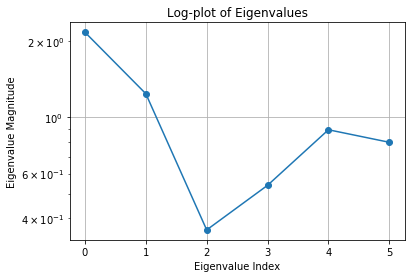

In [39]:
plt.semilogy(eigenvalue.real, '-o')
plt.title("Log-plot of Eigenvalues")
plt.xlabel( "Eigenvalue Index" )
plt.ylabel( "Eigenvalue Magnitude" )
plt.grid()
plt.show()

In [40]:
dfEVal = pd.DataFrame(eigenvalue)
print(dfEVal)

0
0  2.169645
1  1.240526
2  0.359418
3  0.539262
4  0.893691
5  0.797459


Karena eigen value memiliki delta paling besar pada nilai fitur ke 0 dan 1, maka jumlah component optimum berada pada nilai 1. Tetapi karena jumlah data ada 6, lebih baik menjadi 2 karena kalau hanya 1 component, tidak akan bisa dilakukan visualisasi.

In [41]:
nPrincipal = 2

pca = PCA(n_components=nPrincipal)
principalComponents = pca.fit_transform(data_particle)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

principalDf.shape

(548325, 2)

In [42]:
df = principalComponents

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.73704366 0.26295109]


In [43]:
# sns.pairplot(principalDf, kind="reg")

Berdasarkan visualisasi di atas, data terkesan linear. (dapat direpresentasikan dengan menggunakan garis lurus) <br>
Karena data linear, kemungkinan besar data tidak perlu dilakukan Manifold learning karena tidak akan saling bertumpuk satu sama lain.

# Tujuan Tugas Besar

Melakukan Clustering terhadap data yang ada untuk menentukan polusi atau tidak.

Melakukan Regresi (prediksi) untuk menentukan data masukkan (input) termasuk polusi atau tidak.

# Tentukan metode yang akan dipakai untuk mencapai setiap tujuan.


Menggunakan metode K-Means untuk melakukan Clustering yang dapat membantu mendapatkan solusi / kelas dari masing-masing data.

Setelah mengetahui kelas/ solusi dari Clustering, akan dilakukan regresi untuk mengetahui prediksi dari kelas tersebut.

In [44]:
data_cleaned.groupby(['Address','Station code'])['Measurement date'].count()

Address                                                            Station code
10, Poeun-ro 6-gil, Mapo-gu, Seoul, Republic of Korea              106             22038
11, Yangsan-ro 23-gil, Yeongdeungpo-gu, Seoul, Republic of Korea   119             22360
136, Hannam-daero, Yongsan-gu, Seoul, Republic of Korea            103             21620
14, Sillimdong-gil, Gwanak-gu, Seoul, Republic of Korea            121             18706
15, Deoksugung-gil, Jung-gu, Seoul, Republic of Korea              102             22260
16, Sinbanpo-ro 15-gil, Seocho-gu, Seoul, Republic of Korea        122             19904
17, Sanggye-ro 23-gil, Nowon-gu, Seoul, Republic of Korea          114             22965
18, Ttukseom-ro 3-gil, Seongdong-gu, Seoul, Republic of Korea      107             22263
19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republic of Korea          101             23710
20, Geumha-ro 21-gil, Geumcheon-gu, Seoul, Republic of Korea       118             22763
215, Jinheung-ro, Eunpyeong-gu

In [45]:
from datetime import datetime 
date = []
time = []
for i in range(0,548325):
    x = data_cleaned['Measurement date'][i][0:11]
    y = data_cleaned['Measurement date'][i][11:16]
    date.append(x)
    time.append(y)

In [46]:
data_cleaned['date'] = date
data_cleaned['time'] = time
data_cleaned = data_cleaned.drop(['Measurement date'], axis=1)
data_cleaned.head()

,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5,date,time
0,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.046,0.002,1.1,70.0,61.0,2017-01-01,05:00
1,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.049,0.002,1.1,66.0,57.0,2017-01-01,06:00
2,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.045,0.002,1.0,71.0,60.0,2017-01-01,07:00
3,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.047,0.002,1.1,72.0,60.0,2017-01-01,08:00
4,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.047,0.002,1.1,74.0,63.0,2017-01-01,09:00


In [47]:
data_cleaned_avg = data_cleaned.groupby(['Address','date'], as_index=False).agg({
    "SO2" : "mean",
    "NO2" : "mean",
    "O3": "mean",
    "CO" : "mean",
    "PM10" : "mean",
    "PM2.5" : "mean"
})

In [48]:
data_cleaned_avg

,Address,date,SO2,NO2,O3,CO,PM10,PM2.5
0,"10, Poeun-ro 6-gil, Mapo-gu, Seoul, Republic o...",2017-01-01,0.005071,0.052786,0.004714,1.042857,78.642857,70.142857
1,"10, Poeun-ro 6-gil, Mapo-gu, Seoul, Republic o...",2017-01-02,0.005375,0.043000,0.017188,1.006250,101.750000,88.875000
2,"10, Poeun-ro 6-gil, Mapo-gu, Seoul, Republic o...",2017-01-03,0.005222,0.041556,0.015556,0.866667,72.833333,60.500000
3,"10, Poeun-ro 6-gil, Mapo-gu, Seoul, Republic o...",2017-01-04,0.005167,0.053722,0.010833,0.944444,48.833333,39.444444
4,"10, Poeun-ro 6-gil, Mapo-gu, Seoul, Republic o...",2017-01-05,0.003905,0.039571,0.012143,0.680952,29.000000,22.285714
...,...,...,...,...,...,...,...,...
26559,"71, Gangseo-ro 45da-gil, Gangseo-gu, Seoul, Re...",2019-12-27,0.004773,0.028909,0.020545,0.509091,39.818182,22.772727
26560,"71, Gangseo-ro 45da-gil, Gangseo-gu, Seoul, Re...",2019-12-28,0.004636,0.049364,0.006091,0.681818,49.727273,23.636364
26561,"71, Gangseo-ro 45da-gil, Gangseo-gu, Seoul, Re...",2019-12-29,0.003750,0.044958,0.005542,0.625000,52.166667,26.458333
26562,"71, Gangseo-ro 45da-gil, Gangseo-gu, Seoul, Re...",2019-12-30,0.004417,0.031792,0.014167,0.579167,41.625000,24.666667


In [49]:
month = []
total = []
for i in range(0,26564):
    x = int(data_cleaned_avg['date'][i][0:4])
    y = data_cleaned_avg['date'][i][5:7]
    z = int(data_cleaned_avg['date'][i][8:10])
    if(y == '01'):
        month = 0
    elif (y == '02'):
        month = 31
    elif (y == '03'):
        month = 59
    elif (y == '04'):
        month = 90
    elif (y == '05'):
        month = 120
    elif (y == '06'):
        month = 151
    elif (y == '07' ):
        month = 181
    elif (y == '08'):
        month = 212
    elif (y == '09'):
        month = 243
    elif (y == '10'):
        month = 273
    elif (y == '11'):
        month = 304
    elif (y == '12'):
        month = 334
    k = x*365+month+z
    total.append(k)

In [50]:
data_cleaned_avg = data_cleaned_avg.drop(['date'], axis=1)
data_cleaned_avg['Date'] = total
data_cleaned_avg.head()

,Address,SO2,NO2,O3,CO,PM10,PM2.5,Date
0,"10, Poeun-ro 6-gil, Mapo-gu, Seoul, Republic o...",0.005071,0.052786,0.004714,1.042857,78.642857,70.142857,736206
1,"10, Poeun-ro 6-gil, Mapo-gu, Seoul, Republic o...",0.005375,0.043000,0.017188,1.006250,101.750000,88.875000,736207
2,"10, Poeun-ro 6-gil, Mapo-gu, Seoul, Republic o...",0.005222,0.041556,0.015556,0.866667,72.833333,60.500000,736208
3,"10, Poeun-ro 6-gil, Mapo-gu, Seoul, Republic o...",0.005167,0.053722,0.010833,0.944444,48.833333,39.444444,736209
4,"10, Poeun-ro 6-gil, Mapo-gu, Seoul, Republic o...",0.003905,0.039571,0.012143,0.680952,29.000000,22.285714,736210


In [51]:
data_cleaned_avg = pd.get_dummies(data_cleaned_avg)
data_cleaned_avg.head()

,SO2,NO2,O3,CO,PM10,PM2.5,Date,"Address_10, Poeun-ro 6-gil, Mapo-gu, Seoul, Republic of Korea","Address_11, Yangsan-ro 23-gil, Yeongdeungpo-gu, Seoul, Republic of Korea","Address_136, Hannam-daero, Yongsan-gu, Seoul, Republic of Korea",...,"Address_426, Hakdong-ro, Gangnam-gu, Seoul, Republic of Korea","Address_43, Cheonho-daero 13-gil, Dongdaemun-gu, Seoul, Republic of Korea","Address_45, Gamasan-ro 27-gil, Guro-gu, Seoul, Republic of Korea","Address_49, Samyang-ro 139-gil, Gangbuk-gu, Seoul, Republic of Korea","Address_56, Jungang-ro 52-gil, Yangcheon-gu, Seoul, Republic of Korea","Address_571, Gwangnaru-ro, Gwangjin-gu, Seoul, Republic of Korea","Address_59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul, Republic of Korea","Address_6, Sadang-ro 16a-gil, Dongjak-gu, Seoul, Republic of Korea","Address_70, Samyang-ro 2-gil, Seongbuk-gu, Seoul, Republic of Korea","Address_71, Gangseo-ro 45da-gil, Gangseo-gu, Seoul, Republic of Korea"
0,0.005071,0.052786,0.004714,1.042857,78.642857,70.142857,736206,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.005375,0.043000,0.017188,1.006250,101.750000,88.875000,736207,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.005222,0.041556,0.015556,0.866667,72.833333,60.500000,736208,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.005167,0.053722,0.010833,0.944444,48.833333,39.444444,736209,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.003905,0.039571,0.012143,0.680952,29.000000,22.285714,736210,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
data_cleaned_avg.to_csv(r'data_cleaned_avg.csv', index = False, header=True)
data_cleaned_avg

,SO2,NO2,O3,CO,PM10,PM2.5,Date,"Address_10, Poeun-ro 6-gil, Mapo-gu, Seoul, Republic of Korea","Address_11, Yangsan-ro 23-gil, Yeongdeungpo-gu, Seoul, Republic of Korea","Address_136, Hannam-daero, Yongsan-gu, Seoul, Republic of Korea",...,"Address_426, Hakdong-ro, Gangnam-gu, Seoul, Republic of Korea","Address_43, Cheonho-daero 13-gil, Dongdaemun-gu, Seoul, Republic of Korea","Address_45, Gamasan-ro 27-gil, Guro-gu, Seoul, Republic of Korea","Address_49, Samyang-ro 139-gil, Gangbuk-gu, Seoul, Republic of Korea","Address_56, Jungang-ro 52-gil, Yangcheon-gu, Seoul, Republic of Korea","Address_571, Gwangnaru-ro, Gwangjin-gu, Seoul, Republic of Korea","Address_59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul, Republic of Korea","Address_6, Sadang-ro 16a-gil, Dongjak-gu, Seoul, Republic of Korea","Address_70, Samyang-ro 2-gil, Seongbuk-gu, Seoul, Republic of Korea","Address_71, Gangseo-ro 45da-gil, Gangseo-gu, Seoul, Republic of Korea"
0,0.005071,0.052786,0.004714,1.042857,78.642857,70.142857,736206,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.005375,0.043000,0.017188,1.006250,101.750000,88.875000,736207,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.005222,0.041556,0.015556,0.866667,72.833333,60.500000,736208,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.005167,0.053722,0.010833,0.944444,48.833333,39.444444,736209,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.003905,0.039571,0.012143,0.680952,29.000000,22.285714,736210,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26559,0.004773,0.028909,0.020545,0.509091,39.818182,22.772727,737296,0,0,0,...,0,0,0,0,0,0,0,0,0,1
26560,0.004636,0.049364,0.006091,0.681818,49.727273,23.636364,737297,0,0,0,...,0,0,0,0,0,0,0,0,0,1
26561,0.003750,0.044958,0.005542,0.625000,52.166667,26.458333,737298,0,0,0,...,0,0,0,0,0,0,0,0,0,1
26562,0.004417,0.031792,0.014167,0.579167,41.625000,24.666667,737299,0,0,0,...,0,0,0,0,0,0,0,0,0,1
